In [7]:
import tensorflow as tf
from tensorflow import keras as ks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [66]:
pokemon = pd.read_csv(r'C:\Users\brian\OneDrive\Documents\Desktop\UCSB\Stats\Pstat197\final_group_assignment_group3\CNN_Source\pokemon.csv')
pokemon = pokemon.sort_values(by=['Name'], 
                              ascending=True).reset_index(drop=True)

In [6]:
display(pokemon.head())
display(pokemon.describe())
display(pokemon['Type1'].unique())

,Name,Type1,Type2
0,abomasnow,Grass,Ice
1,abra,Psychic,NaN
2,absol,Dark,NaN
3,accelgor,Bug,NaN
4,aegislash-blade,Steel,Ghost


,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,abomasnow,Water,Flying
freq,1,114,95


array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

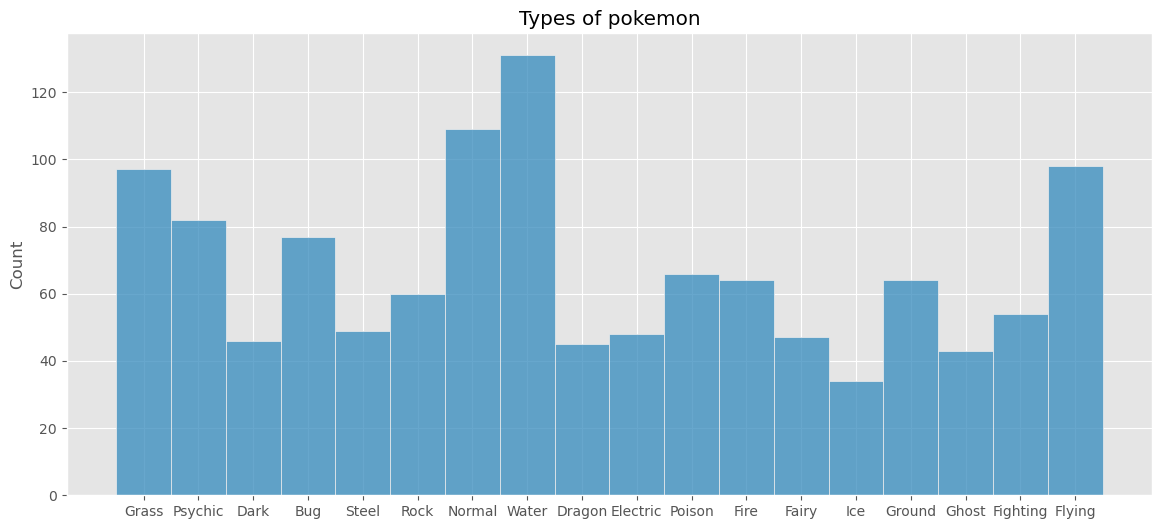

In [67]:
X=pokemon['Type1'].tolist()+pokemon["Type2"].tolist()
plt.figure(figsize=(14, 6))
sns.histplot(x=X)
plt.title('Types of pokemon')
plt.show()

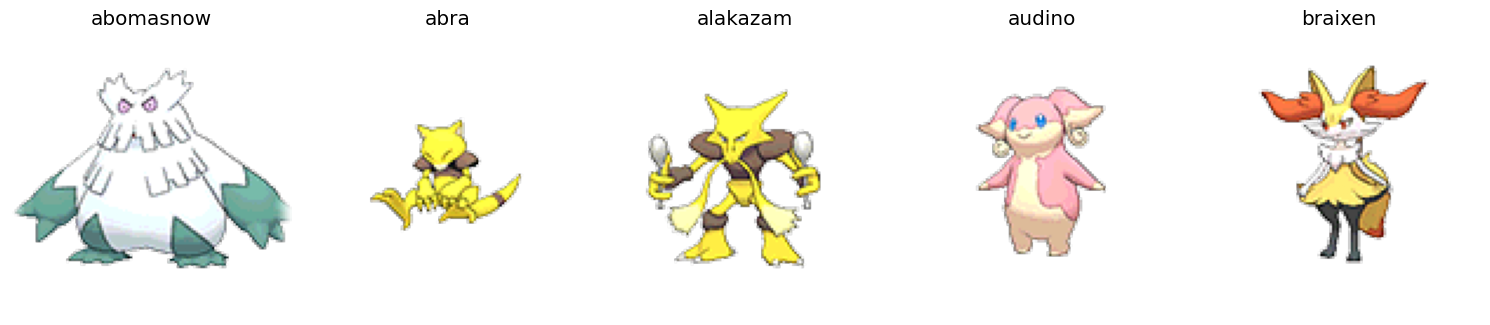

In [69]:
# testing images reading
import matplotlib.image as mpimg
path = "C:/Users/brian/OneDrive/Documents/Desktop/UCSB/Stats/Pstat197/final_group_assignment_group3/CNN_Source/images/"
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 8))
ax = [ax1, ax2, ax3, ax4, ax5]
for i in range(5):
    img = mpimg.imread(path+pokemon['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(pokemon['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [70]:
img_name = sorted(os.listdir(path))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
pokemon['path'] = img_paths

In [71]:
pokemon.shape[0]

809

In [72]:
# Keep only Grass, Fire, Water, Flying, and Normal

Type = []
code = []

for i in range(pokemon.shape[0]):
    if (pokemon.iloc[i]['Type1']=='Grass') or (pokemon.iloc[i]['Type2']=='Grass'):
        Type.append('Grass')
        code.append(1)
    elif (pokemon.iloc[i]['Type1']=='Water') or (pokemon.iloc[i]['Type2']=='Water'):
        Type.append('Water')
        code.append(2)
    elif (pokemon.iloc[i]['Type1']=='Fire') or (pokemon.iloc[i]['Type2']=='Fire'):
        Type.append('Fire')
        code.append(3)
    else:
        Type.append('Other')
        code.append('4')

pokemon["type"]=Type
pokemon["code"]=code
pokemon = pokemon.drop(['Type1', 'Type2', 'Name'], axis=1)

In [73]:
pokemon.head()

,path,type,code
0,C:/Users/brian/OneDrive/Documents/Desktop/UCSB...,Grass,1
1,C:/Users/brian/OneDrive/Documents/Desktop/UCSB...,Other,4
2,C:/Users/brian/OneDrive/Documents/Desktop/UCSB...,Other,4
3,C:/Users/brian/OneDrive/Documents/Desktop/UCSB...,Other,4
4,C:/Users/brian/OneDrive/Documents/Desktop/UCSB...,Other,4


Text(0, 0.5, 'Number of images')

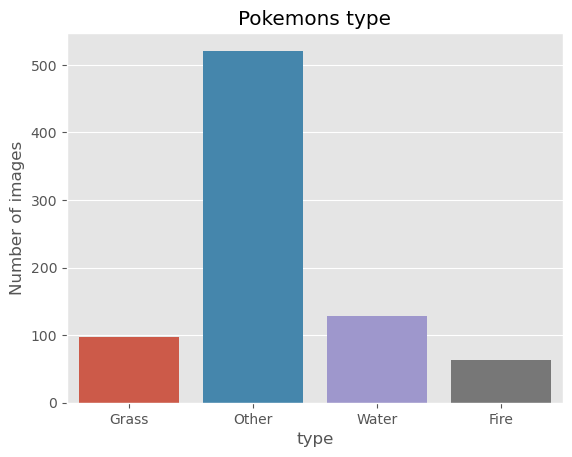

In [74]:
sns.countplot(x=pokemon.type,)
plt.title('Pokemons type')
plt.ylabel('Number of images')

In [86]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagenerator.flow_from_dataframe(
    pokemon, 
    x_col='path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=520,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    pokemon, 
    x_col='path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=520, 
    subset='validation'
)

Found 648 validated image filenames belonging to 4 classes.
Found 161 validated image filenames belonging to 4 classes.


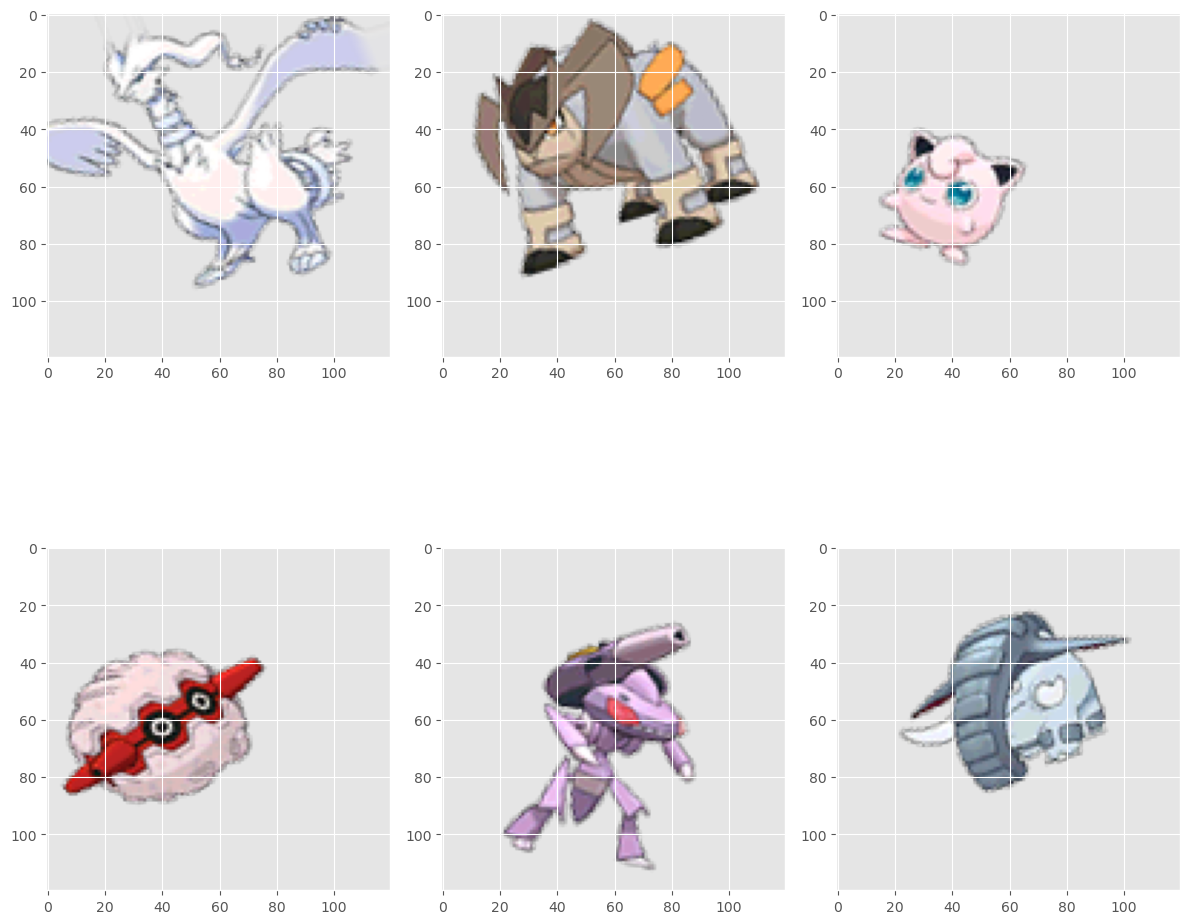

In [87]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [103]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

        
model.add(ks.layers.Flatten())
        
model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [104]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 120, 120, 4)       20        
                                                                 
 conv2d_16 (Conv2D)          (None, 118, 118, 64)      2368      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 256)      

In [106]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [107]:
history = model.fit_generator(
    train_generator, 
    epochs=50,
    validation_data = validation_generator,
)

Epoch 1/50
21/21 [==============================] - 46s 2s/step - loss: 1.2533 - acc: 0.5509 - val_loss: 1.1417 - val_acc: 0.5963
Epoch 2/50
21/21 [==============================] - 72s 3s/step - loss: 0.9963 - acc: 0.6559 - val_loss: 1.0811 - val_acc: 0.5963
Epoch 3/50
21/21 [==============================] - 63s 3s/step - loss: 0.9578 - acc: 0.6636 - val_loss: 1.0625 - val_acc: 0.5342
Epoch 4/50
21/21 [==============================] - 60s 3s/step - loss: 0.9553 - acc: 0.6590 - val_loss: 1.0351 - val_acc: 0.5901
Epoch 5/50
21/21 [==============================] - 63s 3s/step - loss: 0.9240 - acc: 0.6713 - val_loss: 0.9677 - val_acc: 0.6273
Epoch 6/50
21/21 [==============================] - 60s 3s/step - loss: 0.8752 - acc: 0.6790 - val_loss: 0.9763 - val_acc: 0.6335
Epoch 7/50
21/21 [==============================] - 60s 3s/step - loss: 0.8474 - acc: 0.7022 - val_loss: 1.0358 - val_acc: 0.5590
Epoch 8/50
21/21 [==============================] - 59s 3s/step - loss: 0.8635 - acc: 0.68